In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

In [2]:
def customize_axes(ax,x_p=0,y_p=0,x_p_direction='bottom',y_p_direction='left'):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position(x_p_direction)
    ax.spines['bottom'].set_position(('data', x_p))

    ax.yaxis.set_ticks_position(y_p_direction)
    ax.spines['left'].set_position(('data', y_p))  # anchor y-axis at x=2.8


**2.20** Use suitable graph-plotting software to plot graphs of the trajectory (2.36) of a projectile thrown at $45°$ above the horizontal                 
and subject to linear air resistance for four different values of the drag coefficient, ranging from a significant amount of drag down to no drag at all.                                       
Put all four trajectories on the same plot. 

[Hint: In the absence of any given numbers, you may as well choose convenient values.                                                                       
For example, why not take $v_{x_o} = v_{y_o} = 1$ and $g = 1$.                                                                                                     
(This amounts to choosing your units of length and time so that these parameters have the value 1.)                                                            
With these choices, the strength of the drag is given by the one parameter $v_{terr} = \tau$,                                                            
and you might choose to plot the trajectories for
$v_{ter} = 0.3, 1, 3, $ and $\infty$ (that is, no drag at all), and for times from $t = 0$ to $3$.                                                            
For the case that $v_{ter} = \infty$, you'll probably want to write out the trajectory separately.]

---

##### **Projectile Motion with Linear Drag**

For drag force $\vec{F}_\text{drag} = -m \vec{v} / \tau$, the **trajectory** is given by:

##### Equation (2.36) — Position as a function of time:

$$
\begin{aligned}
x(t) &= v_{x0} \tau (1 - e^{-t/\tau}) \\
y(t) &= \left(v_{y0} + g\tau \right)\tau (1 - e^{-t/\tau}) - g\tau t
\end{aligned}
$$

Where:

* $\tau = v_{ter}$ is the terminal velocity parameter,
* $v_{x0}, v_{y0}$ are initial velocities,
* $g$ is gravity.

For **no drag** (i.e., $\tau = \infty$), the motion follows the standard parabola:

$$
\begin{aligned}
x(t) &= v_{x0} t \\
y(t) &= v_{y0} t - \frac{1}{2} g t^2
\end{aligned}
$$

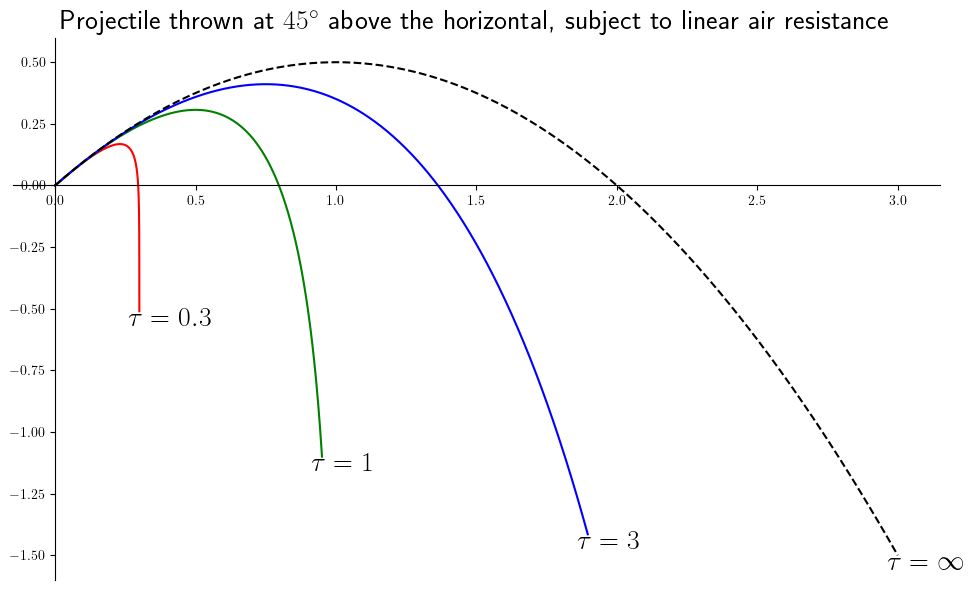

In [3]:
t      = np.linspace(0, 3, 500)
vx0    = 1
vy0    = 1
g      = 1
taus   = [0.3, 1, 3]
colors = ['r', 'g', 'b']
labels = [r'$\tau = 0.3$', r'$\tau = 1$', r'$\tau = 3$']

fig=plt.figure(figsize=(10, 6))
ax = plt.axes()
customize_axes(ax)

for tau, color, label in zip(taus, colors, labels):
    x = vx0 * tau * (1 - np.exp(-t / tau))
    y = (vy0 + g * tau) * tau * (1 - np.exp(-t / tau)) - g * tau * t
    ax.plot(x, y, color)
    ax.text(x[-1]-0.04,y[-1]-0.06,label, fontsize=20)

x_no_drag = vx0 * t
y_no_drag = vy0 * t - 0.5 * g * t**2
ax.plot(x_no_drag, y_no_drag, 'k--')
ax.text(x_no_drag[-1]-0.04, y_no_drag[-1]-0.06, r'$\tau = \infty$', fontsize=20)
plt.title(r'Projectile thrown at $45^{\circ}$ above the horizontal, subject to linear air resistance', fontsize=20)
plt.tight_layout()
plt.show()

**2.22** The equation (2.39) for the range of a projectile in a linear medium cannot be solved analytically in terms of elementary functions.         
If you put in numbers for the several parameters, then it can be solved numerically using any of several software packages such as Python.                                                                                                                                                 
To practice this, do the following: Consider a projectile launched at angle $\theta$ above the horizontal ground with initial speed $v_o$ in a linear medium.                                                                                                                                                   
Choose units such that $v_o = 1$ and $g = 1$.
Suppose also that the terminal speed $v_{ter} = 1$. (With $v_o = v_{ter}$ , air resistance should be fairly important.)                                     
We know that in a vacuum, the maximum range occurs at $\theta = \pi/4 \approx 0.75$.                                                                    
(a) What is the maximum range in a vacuum?                                                                                                             
(b) Now solve (2.39) for the range in the given medium at the same angle $\theta = 0.75$.                                                                      
(c) Once you have your calculation working, repeat it for some selection of values of $\theta$ within which the maximum range probably lies.            
(You could try $\theta = 0.4, 0.5, ... , 0.8$)                                                                                                                
(d) Based on these results, choose a smaller interval for 0 where you're sure the maximum lies and repeat the process.                                     
Repeat it again if necessary until you know the maximum range and the corresponding angle to two significant figures. Compare with the vacuum values.

---


* Initial speed $v_0 = 1$
* Gravitational acceleration $g = 1$
* Terminal speed $v_{ter} = 1$
* Therefore, the drag coefficient is $b = \frac{g}{v_{ter}} = 1$


##### **(a) Maximum range in vacuum**

In the vacuum (no air resistance), the range $R$ is given by:

$$
R = \frac{v_0^2 \sin(2\theta)}{g}
$$

With $v_0 = 1$, $g = 1$, and $\theta = \frac{\pi}{4}$:

$$
R_{\text{vac}} = \frac{1 \cdot \sin(\pi/2)}{1} = 1
$$

 **Answer (a)**: The maximum range in vacuum is **1**.

##### **(b) Solve for range in medium at $\theta = 0.75$ radians**

We solve equation (2.39), which comes from the linear air resistance model:

$$
x(t) = \frac{v_0 \cos \theta}{b} \left(1 - e^{-bt}\right), \quad y(t) = \frac{1}{b} \left(v_0 \sin \theta + \frac{g}{b}\right)(1 - e^{-bt}) - \frac{g}{b}t
$$

Using:

* $b = 1$
* $v_0 = g = v_{ter} = 1$

We numerically find the time $t_f$ when the projectile hits the ground (i.e. $y(t_f) = 0$), and then compute $x(t_f)$ as the **range**.


In [4]:
v0 = 1
g = 1
b = 1  # from v_ter = g / b = 1 ⇒ b = 1

def y(t, theta):
    term1 = (v0 * np.sin(theta) + g / b) * (1 - np.exp(-b * t)) / b
    term2 = (g / b) * t
    return term1 - term2

def x(t, theta):
    return (v0 * np.cos(theta)) * (1 - np.exp(-b * t)) / b

def compute_range(theta):
    t_guess = 2.0
    t_flight = sc.optimize.fsolve(y, t_guess, args=(theta))[0]
    return x(t_flight, theta)

# (b) Range at theta = 0.75
theta = 0.75
range_b = compute_range(theta)
print(f"(b) Range with air resistance at θ = 0.75 rad: {range_b:.4f} \n")

# (c) Try several angles
angles = np.arange(0.4, 0.85, 0.05)
ranges = np.array([compute_range(th) for th in angles])
print('(c)')
import pandas as pd
f = pd.DataFrame({r'$\theta$ (rad)': angles, '$r$ (range)': ranges})
display(f.T)

# (d) Zoom in to find max range and optimal angle
fine_angles = np.arange(0.58, 0.65, 0.01)
fine_ranges = [compute_range(th) for th in fine_angles]
print('(d)')
f = pd.DataFrame({r'$\theta$ (rad)': fine_angles, '$r$ (range)': fine_ranges})
display(f.T)

max_index = np.argmax(fine_ranges)
theta_max = fine_angles[max_index]
range_max = fine_ranges[max_index]

print(f"\n Max range with air resistance: {range_max:.4f} at theta = {theta_max:.2f} rad")

(b) Range with air resistance at θ = 0.75 rad: 0.4996 

(c)


,0,1,2,3,4,5,6,7,8
$\theta$ (rad),0.400000,0.45000,0.500000,0.550000,0.600000,0.650000,0.700000,0.750000,0.800000
$r$ (range),0.462867,0.48422,0.499497,0.509158,0.513623,0.513282,0.508495,0.499597,0.486905


(d)


,0,1,2,3,4,5,6,7
$\theta$ (rad),0.580000,0.590000,0.600000,0.610000,0.620000,0.630000,0.640000,0.650000
$r$ (range),0.512435,0.513127,0.513623,0.513927,0.514043,0.513972,0.513717,0.513282



 Max range with air resistance: 0.5140 at theta = 0.62 rad


**2.43** The basketball of Problem 2.31 is thrown from a height of with initial velocity $v_o = 15 \ m/s$ at $45°$ above the horizontal.                          
(a) Use appropriate software to solve the equations of motion (2.61) for the ball's position $(x, y)$ and plot the trajectory.                              
Show the corresponding trajectory in the absence of air resistance.                                                                                        
(b) Use your plot to find how far the ball travels in the horizontal direction before it hits the floor.                                                
Compare with the corresponding range in a vacuum.

---

We’ll assume linear drag (i.e., **force of air resistance is proportional to velocity**):

$$
\vec{F}_{\text{drag}} = -b \vec{v}
$$

##### Equations of Motion (with Linear Drag)

From Taylor's Eq. (2.61), the motion with **linear drag** is governed by:

$$
\begin{aligned}
x(t) &= \frac{v_0 \cos\theta}{b}(1 - e^{-bt}) \\
y(t) &= \left( \frac{v_0 \sin\theta + \frac{g}{b}}{b} \right) (1 - e^{-bt}) - \frac{g}{b}t
\end{aligned}
$$

We’ll numerically solve these equations to find the **trajectory until the ball hits the ground**.


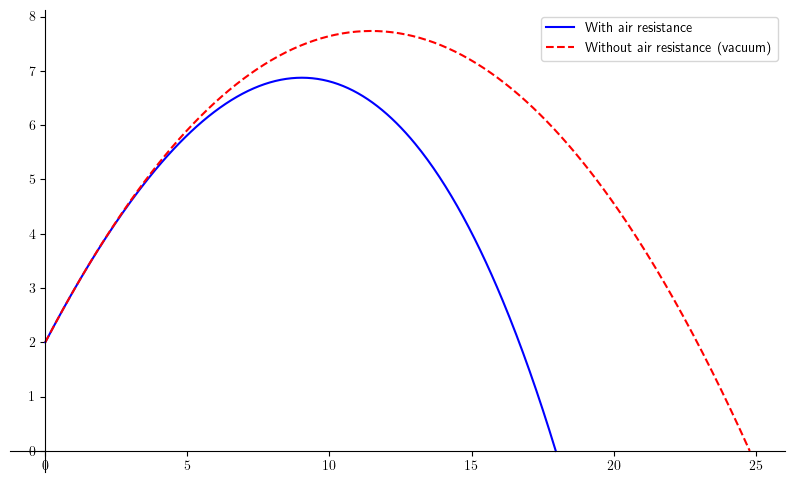

Range with air resistance: 17.96 m
Range in vacuum: 24.79 m


In [5]:
def xy_with_drag(t):
    vx = (v0 * np.cos(theta)) / b * (1 - np.exp(-b * t))
    x = vx
    vy = ((v0 * np.sin(theta) + g / b) / b) * (1 - np.exp(-b * t)) - (g / b) * t
    y = vy + y0
    return x, y

def y_with_drag(t):
    return ((v0 * np.sin(theta) + g / b) / b) * (1 - np.exp(-b * t)) - (g / b) * t + y0

v0    = 15                  # m/s
theta = np.radians(45)      # convert to radians
g     = 9.81                # m/s²
b     = 0.25                # drag coefficient (1/s), you can adjust this value
y0    = 2                   # Initial height (say 2 meters from hand)

t_flight_drag = sc.optimize.fsolve(y_with_drag, 2)[0]
t_vals = np.linspace(0, t_flight_drag, 300)
x_drag = []
y_drag = []

for t in t_vals:
    x, y = xy_with_drag(t)
    x_drag.append(x)
    y_drag.append(y)

t_flight_vacuum = (v0 * np.sin(theta) + np.sqrt((v0 * np.sin(theta))**2 + 2 * g * y0)) / g
t_vals_vac      = np.linspace(0, t_flight_vacuum, 300)
x_vac           = v0 * np.cos(theta) * t_vals_vac
y_vac           = y0 + v0 * np.sin(theta) * t_vals_vac - 0.5 * g * t_vals_vac**2

fig=plt.figure(figsize=(10, 6))
ax = plt.axes()
customize_axes(ax)
ax.plot(x_drag, y_drag, label="With air resistance", color="blue")
ax.plot(x_vac, y_vac, label="Without air resistance (vacuum)", linestyle='--', color="red")
ax.legend()
plt.show()

print(f"Range with air resistance: {x_drag[-1]:.2f} m")
print(f"Range in vacuum: {x_vac[-1]:.2f} m")

**2.44** To get an accurate trajectory for a projectile one must often take account of several complications.                                              
For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases.                              
To illustrate this, consider an iron cannonball (diameter $15 \ cm$, density $7.8 g/cm^3$) that is fired with initial velocity $300 \ m/s$ at $50$ degrees above the horizontal.                                                                                                                                                             
The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height,                                
the drag force is $f = c(y)v^2$  where $c(y) = \gamma D^2 exp(—y/\lambda)$ with $\gamma$ given by (2.6) and $\lambda\approx 10, 000 \ m$.

(a) Write down the equations of motion for the cannonball and use appropriate software to solve numerically for $x(t)$ and $y(t)$ for $0\le t \le 3.5 \  s$.        
Plot the ball's trajectory and find its horizontal range. 

(b) Do the same calculation ignoring the variation of atmospheric density [that is, setting $c(y) = c(0)$], and yet again ignoring air resistance
entirely.   
Plot all three trajectories for $0 \le t \le 3.5 \ s$ on the same graph.                                                                                 
You will find that in this case air resistance makes a huge difference and that the variation of air resistance makes a small, but not negligible, difference.

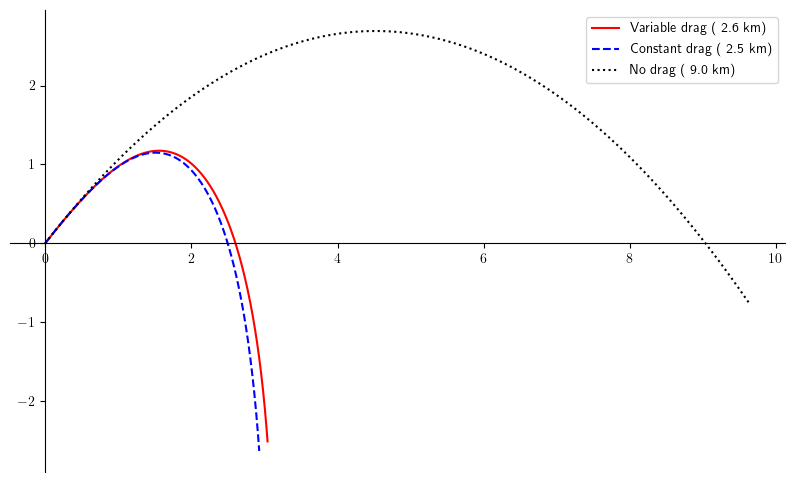

In [6]:
def ode_variable_drag(t, Y):
    x, y, vx, vy = Y
    v = np.sqrt(vx**2 + vy**2)
    c_y = c0 * np.exp(-y / lambda_)  # variable air resistance
    ax = -c_y * v * vx / m
    ay = -g - c_y * v * vy / m
    return [vx, vy, ax, ay]

def ode_constant_drag(t, Y):
    x, y, vx, vy = Y
    v = np.sqrt(vx**2 + vy**2)
    ax = -c0 * v * vx / m
    ay = -g - c0 * v * vy / m
    return [vx, vy, ax, ay]

def ode_no_drag(t, Y):
    x, y, vx, vy = Y
    return [vx, vy, 0, -g]

def compute_range(sol):
    x, y = sol.y[0], sol.y[1]
    for i in range(1, len(y)):
        if y[i] < 0:
            # Linear interpolation for accurate landing point
            x1, x2 = x[i-1], x[i]
            y1, y2 = y[i-1], y[i]
            return x1 + (x2 - x1) * (-y1) / (y2 - y1)
    return x[-1]  # fallback

D         = 0.15  # diameter in meters
rho_iron  = 7800  # kg/m^3
v0        = 300  # initial speed in m/s
theta_deg = 50
theta     = np.radians(theta_deg)
g         = 9.81  # m/s^2
lambda_   = 10000  # scale height for atmosphere in meters
rho_air   = 1.2  # kg/m^3 at sea level
Cd        = 0.47  # drag coefficient for a sphere
gamma     = 0.5 * rho_air * Cd  # part of drag constant
c0        = gamma * D**2  # drag constant at sea level
V         = (4/3) * np.pi * (D / 2)**3
m         = rho_iron * V   # Mass of the cannonball
vx0       = v0 * np.cos(theta)
vy0       = v0 * np.sin(theta)
y0        = [0, 0, vx0, vy0]  # [x, y, vx, vy]
t_span    = (0, 50)
t_eval    = np.linspace(t_span[0], t_span[1], 2000)

sol_var    = sc.integrate.solve_ivp(ode_variable_drag, t_span, y0, t_eval=t_eval)
sol_const  = sc.integrate.solve_ivp(ode_constant_drag, t_span, y0, t_eval=t_eval)
sol_nodrag = sc.integrate.solve_ivp(ode_no_drag, t_span, y0, t_eval=t_eval)
r_var      = compute_range(sol_var)
r_const    = compute_range(sol_const)
r_nodrag   = compute_range(sol_nodrag)

fig=plt.figure(figsize=(10, 6))
ax =plt.axes()
customize_axes(ax)
ax.plot(sol_var.y[0]/1000, sol_var.y[1]/1000, 'r-', label=f'Variable drag (~{r_var/1000:.1f} km)')
ax.plot(sol_const.y[0]/1000, sol_const.y[1]/1000, 'b--', label=f'Constant drag (~{r_const/1000:.1f} km)')
ax.plot(sol_nodrag.y[0]/1000, sol_nodrag.y[1]/1000, 'k:', label=f'No drag (~{r_nodrag/1000:.1f} km)')
ax.legend()
plt.show()